In [0]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.optimize import curve_fit

In [0]:
s=[[1, 1.709860e+10, 9.882135e-01, 1.800509e+03, -6.951166e+05],
[2 ,8.549299e+09, 1.377920e+00 ,1.587362e+03, -2.489381e+06],
[3, 4.274650e+09, 1.596560e+00 ,1.371372e+03, -3.648443e+06],
[4, 2.137325e+09, 2.278194e+00, 1.175036e+03, -4.441231e+06],
[5, 1.068662e+09, 2.978446e+00, 1.004237e+03, -4.972155e+06],
[6, 5.343312e+08 ,3.945016e+00, 8.566651e+02, -5.338681e+06],
[7, 2.671656e+08, 4.804284e+00, 7.300468e+02, -5.595466e+06],
[8, 1.335828e+08, 6.565640e+00, 6.213205e+02 ,-5.779845e+06],
[9, 6.679140e+07, 9.118771e+00, 5.281159e+02 ,-5.914153e+06],
[10, 3.339570e+07, 1.294697e+01, 4.479740e+02, -6.014636e+06],
[11, 1.669785e+07, 1.879395e+01, 3.790007e+02, -6.091109e+06],
[12, 8.348925e+06, 2.788737e+01, 3.195392e+02, -6.150809e+06],
[13, 3.932678e+10, 7.541419e-01, 2.056349e+03, 2.672650e+06],
[14, 4.522579e+10, 7.220323e-01, 2.084648e+03, 3.426775e+06],
[15, 5.200966e+10, 6.916810e-01, 2.106536e+03 ,4.247066e+06],
[16, 5.981111e+10, 6.630206e-01, 2.120222e+03 ,5.138911e+06],
[17, 6.878278e+10, 6.359999e-01, 2.332245e+03 ,7.582476e+06],
[18, 7.910020e+10 ,6.109349e-01, 2.110497e+03 ,7.175049e+06],
[19, 9.096523e+10 ,5.867808e-01, 2.085488e+03 ,8.307535e+06],
[20, 1.046100e+11 ,5.645997e-01, 2.034704e+03 ,9.515448e+06]]

In [0]:
df=pd.DataFrame(s)
df.columns=['index','P','V','T','E']

In [4]:
df.sort_values(by=['V'], inplace=True)
df.head()

,index,P,V,T,E
19,20,1.046100e+11,0.564600,2034.704,9515448.0
18,19,9.096523e+10,0.586781,2085.488,8307535.0
17,18,7.910020e+10,0.610935,2110.497,7175049.0
16,17,6.878278e+10,0.636000,2332.245,7582476.0
15,16,5.981111e+10,0.663021,2120.222,5138911.0


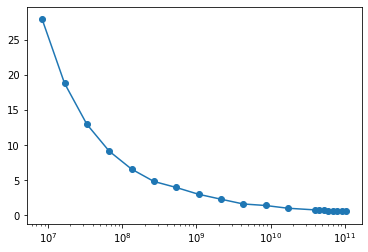

In [11]:
plt.plot(df.P,df.V)
plt.scatter(df.P,df.V)
plt.xscale('log')
#plt.yscale('log')

In [0]:
def JWL(V,r1,r2,A,B,C):
  #xdata=np.array(xdata)
  #V,E=xdata
  #x1=A*(1-(0.5/(r1*V)))*(np.exp(-(r1*V)))
  #x2=B*(1-(0.5/(r2*V)))*(np.exp(-(r2*V)))
  #x3=C*(0.5*E)/V
  #return x1+x2+x3
  return A*(np.exp(-(r1*V)))+B*(np.exp(-(r2*V)))+C*V**(-1.5)

In [0]:
P=df.P/1e+6
V=df.V

In [0]:
from scipy.optimize import curve_fit
import numpy as np

In [0]:
opt,cov=curve_fit(JWL,V,P,(1,2,23247,33548,4324),method='lm')

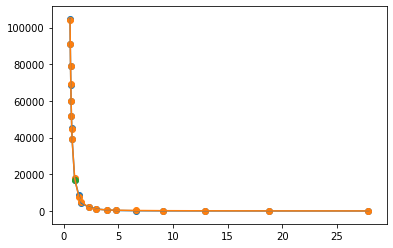

In [127]:

plt.plot(V,P)
plt.scatter(V,P)
plt.plot(V,JWL(V,*opt))
plt.scatter(V,JWL(V,*opt))
#plt.xscale('log')
#plt.yscale('log')
plt.scatter( 9.882135e-01,1.709860e+4)

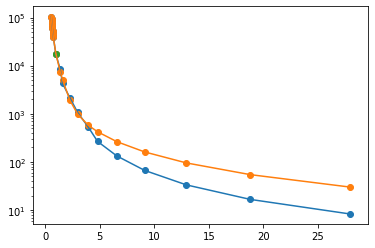

In [136]:

plt.plot(V,P)
plt.scatter(V,P)
plt.plot(V,JWL(V,*opt))
plt.scatter(V,JWL(V,*opt))
#plt.xscale('log')
plt.yscale('log')
plt.scatter( 9.882135e-01,1.709860e+4)

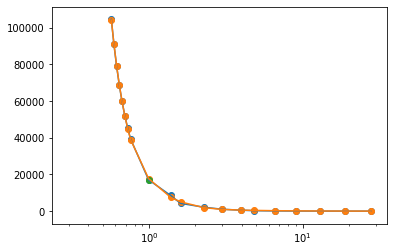

In [92]:
plt.plot(V,P)
plt.scatter(V,P)
plt.plot(V,JWL(V,*opt))
plt.scatter(V,JWL(V,*opt))
plt.xscale('log')
#plt.yscale('log')
plt.scatter( 9.882135e-01,1.709860e+4)

In [93]:
opt

array([8.55200867e+00, 2.28815398e+00, 7.92143171e+06, 1.10744673e+05,
       4.44751358e+03])

In [89]:
JWL(V,*opt)-P

19    -337.230710
18     264.856436
17     211.971700
16     233.503153
15      26.384321
14    -156.840587
13    -267.456541
12    -288.533037
0      663.646558
1    -1007.284764
2      808.563323
3     -240.777496
4      -81.937520
5       46.577852
6      157.049869
7      130.814567
8       94.724078
9       62.074128
10      37.889405
11      21.851080
dtype: float64

In [0]:
V1=np.linspace(0.5,10,1000)

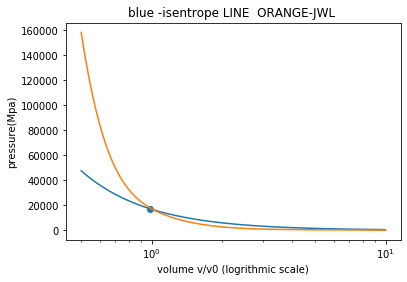

In [164]:
plt.plot(V1,16797.19354596952*V1**-1.5)
#plt.scatter(V1,P)
plt.plot(V1,JWL(V1,*opt))
plt.xscale('log')
#plt.yscale('log')
plt.scatter( 9.882135e-01,1.709860e+4)
plt.title("blue -isentrope LINE  ORANGE-JWL ")
#plt.scatter(V,P)
#plt.scatter(V1,JWL(V1,*opt))
plt.ylabel("pressure(Mpa)")
plt.xlabel("volume v/v0 (logrithmic scale)")
plt.show()


In [165]:
(1.709860e+4* 9.882135e-01**(1.5))

16797.19354596952

In [154]:
P

19    104610.000000
18     90965.230000
17     79100.200000
16     68782.780000
15     59811.110000
14     52009.660000
13     45225.790000
12     39326.780000
0      17098.600000
1       8549.299000
2       4274.650000
3       2137.325000
4       1068.662000
5        534.331200
6        267.165600
7        133.582800
8         66.791400
9         33.395700
10        16.697850
11         8.348925
Name: P, dtype: float64